# Part A

In [1]:
from bs4 import BeautifulSoup as bs
import requests
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
url = 'https://www.cricbuzz.com/cricket-series/3472/indian-premier-league-2021/points-table'
page = requests.get(url)
soup = bs(page.text, 'html.parser')

In [3]:
print(soup.prettify())

<!DOCTYPE html>
<html itemscope="" itemtype="http://schema.org/WebPage" lang="en">
 <head>
  <meta charset="utf-8"/>
  <script>
   var is_mobile = /symbian|tizen|midp|uc(web|browser)|MSIE (5.0|6.0|7.0|8.0)|tablet/i.test(navigator.userAgent);	if(is_mobile && window.location.hostname != "www1.cricbuzz.com") window.location.hostname = "m.cricbuzz.com";
  </script>
  <style>
   body{background:#E3E6E3; font-family: helvetica,"Segoe UI",Arial,sans-serif;color:#222;font-size:14px; line-height: 1.5; margin:0;}	body, .cb-comm-pg, .cb-hm-mid {min-height:1000px}	.container{width:980px;margin:0 auto;}	.page{max-width: 980px;margin: 0 auto;position: relative;}	.cb-col-8 {width:8%;}	.cb-col-10 {width:10%;}	.cb-col-14 {width:14%;}	.cb-col-16 {width:16%;}	.cb-col-20 {width:20%;}	.cb-col-25 {width:25%;}	.cb-col-27 {width:27%;}	.cb-col-30 {width:30%;}	.cb-col-33 {width:33%;}	.cb-col-40 {width:40%;}	.cb-col-46 {width:46%;}	.cb-col-47 {width:47%;}	.cb-col-50 {width:50%;}	.cb-col-60 {width:60%;}	.cb-col-6

In [4]:
# first row information
head = soup.find(class_='cb-srs-gray-strip')
# column names
col_names = head.get_text(separator=",").split(",")

In [5]:
# table information
table_col = []

for x in soup.find_all('td', class_=["cb-srs-pnts-name", "cb-srs-pnts-td", "cb-srs-pnts-td text-bold"]):
    table_col.append(x.text)

In [6]:
# create a dataframe
np_array = np.array(table_col)
reshaped_array = np.reshape(np_array, (8, 8))
team_df = pd.DataFrame(reshaped_array, columns=col_names)
team_df

,Teams,Mat,Won,Lost,Tied,NR,Pts,NRR
0,Delhi Capitals,14,10,4,0,0,20,+0.481
1,Chennai Super Kings,14,9,5,0,0,18,+0.455
2,Royal Challengers Bangalore,14,9,5,0,0,18,-0.140
3,Kolkata Knight Riders,14,7,7,0,0,14,+0.587
4,Mumbai Indians,14,7,7,0,0,14,+0.116
5,Punjab Kings,14,6,8,0,0,12,-0.001
6,Rajasthan Royals,14,5,9,0,0,10,-0.993
7,Sunrisers Hyderabad,14,3,11,0,0,6,-0.545


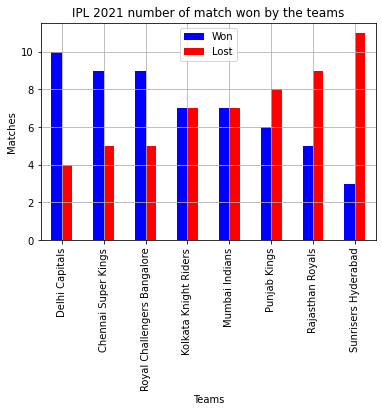

In [7]:
# render a plot
team_bar = team_df[['Teams', 'Won', 'Lost']].set_index('Teams')
team_bar = team_bar.astype(int)
_ = team_bar.plot(kind='bar', color=['b', 'r'], grid=True,
                  title='IPL 2021 number of match won by the teams', ylabel='Matches')

# Part B

In [20]:
import pulp as p

# set decision variables
x1 = p.LpVariable('x1', lowBound=0)
x2 = p.LpVariable('x2', lowBound=0)
x3 = p.LpVariable('x3', lowBound=0)

In [21]:
# set objective function
prob = p.LpProblem("Minimization", sense=p.LpMinimize)
prob += 190*x1 + 260*x2 + 150*x3

In [23]:
# set constraints
prob += 295*x1 + 385*x2 + 350*x3 >= 5500, 'Constraint1'
prob += 260*x1 + 375*x2 + 0*x3 >= 4000, 'Constraint2'
prob += 1*x1 + 0*x2 + 0*x3 <= 8, 'Constraint3'

In [25]:
# find linear program
status = prob.solve()
p.LpStatus[status]

'Optimal'

In [26]:
# minimum value of the production cost
p.value(prob.objective)

3352.11429

In [27]:
# decision variables at the optimal solution
for variable in prob.variables():
    print(variable.name, '=', variable.varValue)

x1 = 8.0
x2 = 5.12
x3 = 3.3394286


In [28]:
# formulate answer report
# All three constraints are binding, with slack ==0.
l = []
for name, c in prob.constraints.items():
    l.append([name, str(prob.constraints[name]), c.pi, c.slack])

pd.DataFrame(l, columns=['name', 'constraints', 'shadow_price', 'slack'])

,name,constraints,shadow_price,slack
0,Constraint1,295*x1 + 385*x2 + 350*x3 >= 5500,0.428571,-0.0
1,Constraint2,260*x1 + 375*x2 >= 4000,0.253333,-0.0
2,Constraint3,x1 <= 8,-2.295238,-0.0


In [29]:
# formulate sensativity report
prob.solve(p.GLPK(options=['--ranges sensitivity.txt']))

file = open('sensitivity.txt')
print(file.read())
file.close()

GLPK 5.0  - SENSITIVITY ANALYSIS REPORT                                                                         Page   1

Problem:    
Objective:  OBJ = 3352.114286 (MINimum)

   No. Row name     St      Activity         Slack   Lower bound       Activity      Obj coef  Obj value at Limiting
                                          Marginal   Upper bound          range         range   break point variable
------ ------------ -- ------------- ------------- -------------  ------------- ------------- ------------- ------------
     1 Constraint1  NL    5500.00000        .         5500.00000     4331.20000       -.42857    2851.20000 x3
                                            .42857          +Inf           +Inf          +Inf          +Inf

     2 Constraint2  NL    4000.00000        .         4000.00000     2080.00000       -.25333    2865.71429 x2
                                            .25333          +Inf     5138.44156          +Inf    3640.51948 x3

     3 Constraint3  NU    

range of optimality (obj coef range)
x1: inf, 192.29524
x2: 256.68956, inf
x3: 121.37767, 236.36364

interpretation
Objective function will remain optimal without causing any change in the values of the decision variables when the objective coeefficients stay within the range of optimality above.